In [1]:
import matplotlib.pyplot as plt

In [2]:
import pickle as pkl
gm_corect = pkl.load( open("gm12878_corrected.pkl", "rb"))
gm_bias = pkl.load( open("gm12878_bias.pkl", "rb"))
k2_corect = pkl.load( open("k562_corrected.pkl", "rb"))
k2_bias = pkl.load( open("k562_bias.pkl", "rb"))
h2_corect = pkl.load( open("hepg2_corrected.pkl", "rb"))
h2_bias = pkl.load( open("hepg2_bias.pkl", "rb"))




0 0
1 1
2 2
4 3


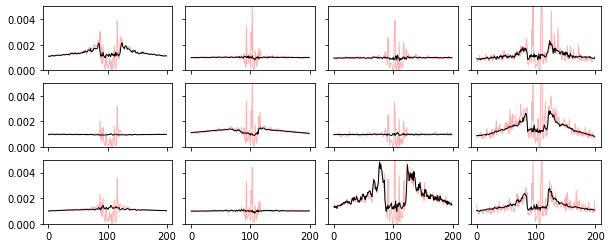

<Figure size 720x288 with 0 Axes>

In [16]:
def plot_tracks(pred_bias,pred_unplug_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    ax.plot(range(width), pred_bias[:, start:end].mean(0), 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), pred_unplug_bias[:, start:end].mean(0), 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  
    #ax.yaxis.set_ticks(np.arange(0, 0.02, 0.06))
    #ax.legend()
    
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4)
fig, axs = plt.subplots(3, 4,sharex=True, sharey=True)
from matplotlib import gridspec

gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

import numpy as np

plt.figure()
i=0
j=0
num=17851
#ylims=[0.003,0.003,0.003,0.003] 
ylims=[0.005,0.005,0.005,0.005,0.005] 

for t in range(0,5):
    if i==3:
        i+=1
        continue
    if i==4:
        tn=t-1
    else:
        tn=t
    plot_tracks(np.array(gm_bias[i]).reshape(num,1000), np.array(gm_corect[i]).reshape(num,1000), axs[j, tn], ylims[i])
    i+=1

i=0
j=1
num=17851
for t in range(0,5):
    if i==3:
        i+=1
        continue
    if i==4:
        tn=t-1
    else:
        tn=t
    plot_tracks(np.array(k2_bias[i]).reshape(num,1000), np.array(k2_corect[i]).reshape(num,1000), axs[j, tn], ylims[i])
    i+=1

i=0
j=2
num=15152
ylims=[0.005,0.005,0.005,0.005,0.005] 
for t in range(0,5):
    if i==3:
        i+=1
        continue
    if i==4:
        tn=t-1
    else:
        tn=t
    print(i,tn)

    plot_tracks(np.array(h2_bias[i]).reshape(num,1000), np.array(h2_corect[i]).reshape(num,1000), axs[j, tn], ylims[i])
    i+=1


#for ax in axs:
#    ax.set_aspect('equal')
#    ax.label_outer()
#plt.subplots_adjust(wspace=None, hspace=None)
#plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()

